Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


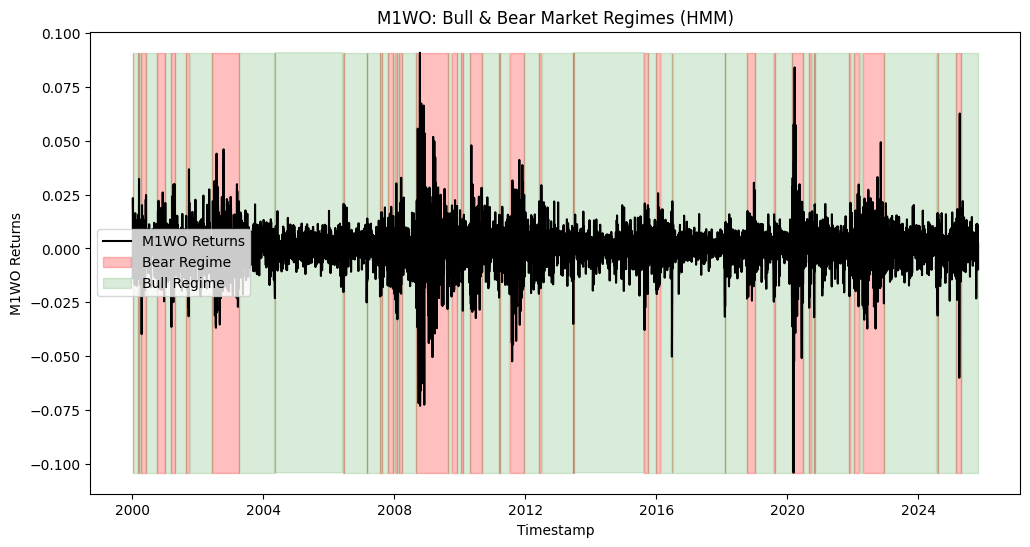

Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


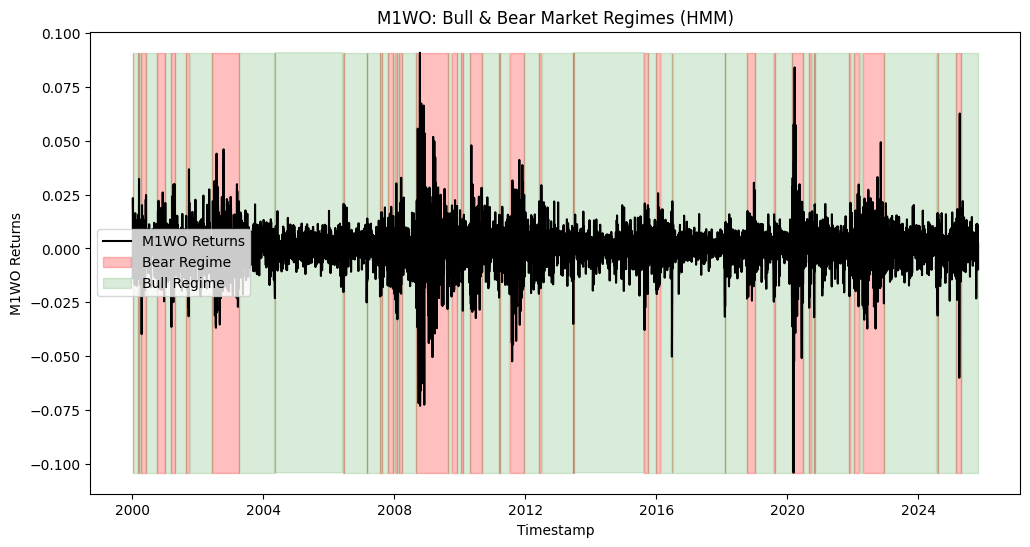

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)
df["Rfree"] = 0

In [2]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    pred_df,
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=0,
)
summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        0.963304  0.042023  0.092020  0.493502    -0.246743   
BuyHoldEq       4.025733  0.103532  0.148473  0.738206    -0.340332   
BuyHoldRF       0.000000  0.000000  0.000000       NaN     0.000000   
Static50_50     1.346223  0.053413  0.074237  0.738206    -0.183277   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.024243        -0.030250       NaN  -0.016781    -0.03025  
BuyHoldEq      0.054493         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.054493       NaN        NaN         NaN  
Static50_50    0.041024        -0.013469       NaN        NaN         NaN  


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_61368/2869902700.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True)


In [3]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    pred_df,
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=0,
)
summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        1.138004  0.047457  0.099732  0.514982    -0.289327   
BuyHoldEq       4.025733  0.103532  0.148473  0.738206    -0.340332   
BuyHoldRF       0.000000  0.000000  0.000000       NaN     0.000000   
Static50_50     1.346223  0.053413  0.074237  0.738206    -0.183277   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.026494        -0.027999       NaN   -0.01453   -0.027999  
BuyHoldEq      0.054493         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.054493       NaN        NaN         NaN  
Static50_50    0.041024        -0.013469       NaN        NaN         NaN  


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_61368/4063035673.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)


/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_61368/2667658521.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Logit": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True),   # must have columns timestamp + y_pred
/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_61368/2667658521.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "RF": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True),


Logit total return: 96.33%
RF total return: 113.80%


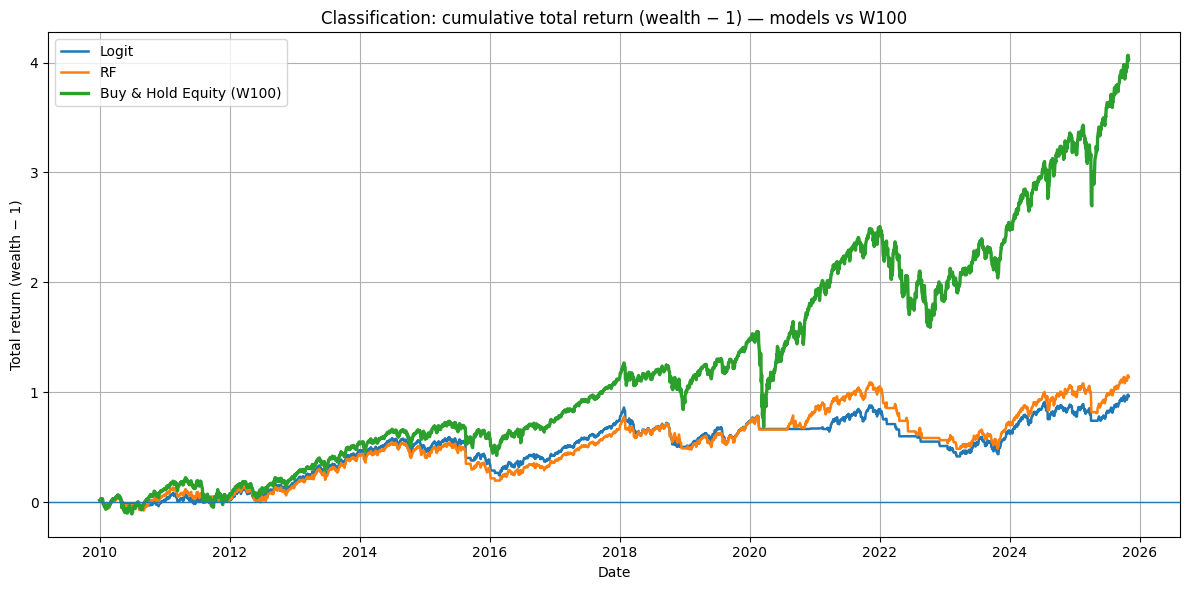

In [4]:

pred_dfs = {
    "Logit": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv", index_col=0, parse_dates=True),   # must have columns timestamp + y_pred
    "RF": pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True),
    #"TabPFN": pred_df_tabpfn,
    #"Mantis": pred_df_mantis,
}

df_mkt = df[["timestamp", "M1WO_O", "Rfree"]].copy()
plot_ts.plot_total_return_models_vs_w100(
    pred_dfs,
    df_mkt,
    price_col="M1WO_O",
    rf_col="Rfree",
    regime_col="y_pred",
    bear_label=0,
    tc_bps=0.0,
    title="Classification: cumulative total return (wealth − 1) — models vs W100",
)

In [5]:
pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)
bt = tsh.backtest_paper_regime_switch(
    pred_df,
    price_col="M1WO_O",
    regime_col="y_pred",
    ts_col="timestamp",
    bear_label=0,
)
summary = tsh.compare_regime_strategies(bt, periods_per_year=252, gamma=5.0, benchmark="BuyHoldEq")
print(summary)

/var/folders/q9/d545ygdx5rj6lg_00gpykppw0000gn/T/ipykernel_61368/4063035673.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pred_df = pd.read_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv", index_col=0, parse_dates=True)


             TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown  \
Strategy                                                              
Strategy        1.138004  0.047457  0.099732  0.514982    -0.289327   
BuyHoldEq       4.025733  0.103532  0.148473  0.738206    -0.340332   
BuyHoldRF       0.000000  0.000000  0.000000       NaN     0.000000   
Static50_50     1.346223  0.053413  0.074237  0.738206    -0.183277   

             AnnUtility  Δu vs BuyHoldEq  Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                                                   
Strategy       0.026494        -0.027999       NaN   -0.01453   -0.027999  
BuyHoldEq      0.054493         0.000000       NaN        NaN         NaN  
BuyHoldRF      0.000000        -0.054493       NaN        NaN         NaN  
Static50_50    0.041024        -0.013469       NaN        NaN         NaN  


In [6]:
df = pd.read_csv("../../Data/MSCI_World_Data.csv")

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["year"] = df["timestamp"].dt.year
df.groupby("year")["M1WO"].agg(["count"])

,count
year,
2000,259
2001,261
2002,261
2003,261
2004,262
2005,260
2006,260
2007,261
2008,262
